In [4]:
print("hello world")

hello world


In [16]:
import pandas as pd
import requests
import os

In [13]:
ActionDB = pd.read_csv('Database/Action.csv')



print(ActionDB.head())
# TMDB API key (sign up at https://www.themoviedb.org/)
TMDB_API_KEY = 'be73b5e81e23018f70909d074e1b8f79'

                                                name  year movie_rated  \
0                                    The Dark Knight  2008       PG-13   
1                                          Inception  2010       PG-13   
2                                         The Matrix  1999           R   
3  The Lord of the Rings: The Fellowship of the Ring  2001       PG-13   
4                              The Dark Knight Rises  2012       PG-13   

  run_length                       genres            release_date  rating  \
0   2h 32min       Action; Crime; Drama;       18 July 2008 (USA)     9.0   
1   2h 28min  Action; Adventure; Sci-Fi;       16 July 2010 (USA)     8.8   
2   2h 16min             Action; Sci-Fi;      31 March 1999 (USA)     8.7   
3   2h 58min   Action; Adventure; Drama;   19 December 2001 (USA)     8.8   
4   2h 44min          Action; Adventure;       20 July 2012 (USA)     8.4   

   num_raters  num_reviews                                         review_url  
0     222452

In [14]:
def fetch_movie_description(title, year):
    url = f"https://api.themoviedb.org/3/search/movie?api_key={TMDB_API_KEY}&query={title}&year={year}"
    response = requests.get(url)
    if response.status_code == 200:
        results = response.json().get('results', [])
        if results:
            return results[0]['overview']  # Return the first match's description
    return None


In [15]:
# Add description column to the dataset
ActionDB['description'] = ActionDB.apply(lambda row: fetch_movie_description(row['name'], row['year']), axis=1)

# Save the enhanced dataset
ActionDB.to_csv('movies_with_descriptions.csv', index=False)

In [ ]:
ActionDB = pd.read_csv('Database/Action.csv')
AdventureDB = pd.read_csv('Database/Adventure.csv')
AnimationDB = pd.read_csv('Database/Animation.csv')
BiographyDB = pd.read_csv('Database/Biography.csv')
ComedyDB = pd.read_csv('Database/Comedy.csv')
CrimeDB = pd.read_csv('Database/Crime.csv')
DramaDB = pd.read_csv('Database/Drama.csv')
FantasyDB = pd.read_csv('Database/Fantasy.csv')
HistoryDB = pd.read_csv('Database/History.csv')
HorrorDB = pd.read_csv('Database/Horror.csv')
MusicDB = pd.read_csv('Database/Music.csv')
MysteryDB = pd.read_csv('Database/Mystery.csv')
RomanceDB = pd.read_csv('Database/Romance.csv')
SciFiDB = pd.read_csv('Database/SciFi.csv')
SportDB = pd.read_csv('Database/Sport.csv')
ThrillerDB = pd.read_csv('Database/Thriller.csv')
WarDB = pd.read_csv('Database/War.csv')

db = [ActionDB, AdventureDB, AnimationDB, BiographyDB, ComedyDB, CrimeDB, DramaDB, FantasyDB, HistoryDB, HorrorDB, MusicDB, MysteryDB, RomanceDB, SciFiDB, SportDB, ThrillerDB, WarDB]
Genres = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'SciFi', 'Sport', 'Thriller', 'War']

In [28]:
import pandas as pd
import os

# Load all Excel sheets into a single DataFrame
def load_data_from_excel(folder_path):
    all_data = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path)
            df['genre'] = file_name.replace('.csv', '')  # Add genre column based on file name
            all_data.append(df)
    return pd.concat(all_data, ignore_index=True)

# Load data
folder_path = './Database'  # Replace with the path to your Excel files
df = load_data_from_excel(folder_path)

# Basic data analysis
print("Dataset Overview:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nUnique Genres:")
print(df['genre'].unique())

print("\nSummary Statistics:")
print(df.describe())

print("\nSample Data:")
print(df.head())


df.to_csv('movies_with_descriptions.csv', index=False)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1700 non-null   object 
 1   year          1700 non-null   int64  
 2   movie_rated   1700 non-null   object 
 3   run_length    1700 non-null   object 
 4   genres        1700 non-null   object 
 5   release_date  1700 non-null   object 
 6   rating        1700 non-null   float64
 7   num_raters    1700 non-null   int64  
 8   num_reviews   1700 non-null   int64  
 9   review_url    1700 non-null   object 
 10  genre         1700 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 146.2+ KB
None

Missing Values:
name            0
year            0
movie_rated     0
run_length      0
genres          0
release_date    0
rating          0
num_raters      0
num_reviews     0
review_url      0
genre           0
dtype: int64

Unique Genres:
['A

In [30]:
df['description'] = df.apply(lambda row: fetch_movie_description(row['name'], row['year']), axis=1)

# Save the enhanced dataset
df.to_csv('movies_with_descriptions.csv', index=False)

In [35]:
relevant_columns = ['name', 'year', 'movie_rated', 'run_length', 'genres', 'release_date', 'rating', 'description']
filtered_df = df[relevant_columns]

print("\nMissing Values:")
print(filtered_df.isnull().sum())



Missing Values:
name            0
year            0
movie_rated     0
run_length      0
genres          0
release_date    0
rating          0
description     4
dtype: int64


In [37]:
# Handle missing descriptions (optional: remove rows with missing descriptions)
filtered_df = filtered_df.dropna(subset=['description'])

print("\nMissing Values:")
print(filtered_df.isnull().sum())

# Save the filtered dataset
filtered_df.to_csv('filtered_movies.csv', index=False)

print("Filtered Dataset:")
print(filtered_df.head())


Missing Values:
name            0
year            0
movie_rated     0
run_length      0
genres          0
release_date    0
rating          0
description     0
dtype: int64
Filtered Dataset:
                                                name  year movie_rated  \
0                                    The Dark Knight  2008       PG-13   
1                                          Inception  2010       PG-13   
2                                         The Matrix  1999           R   
3  The Lord of the Rings: The Fellowship of the Ring  2001       PG-13   
4                              The Dark Knight Rises  2012       PG-13   

  run_length                       genres            release_date  rating  \
0   2h 32min       Action; Crime; Drama;       18 July 2008 (USA)     9.0   
1   2h 28min  Action; Adventure; Sci-Fi;       16 July 2010 (USA)     8.8   
2   2h 16min             Action; Sci-Fi;      31 March 1999 (USA)     8.7   
3   2h 58min   Action; Adventure; Drama;   19 December 

In [33]:
# Analyze descriptions
print("Description Length Analysis:")
filtered_df['description_length'] = filtered_df['description'].apply(len)
print(filtered_df['description_length'].describe())

# Analyze genres
print("\nGenre Distribution:")
print(filtered_df['genres'].value_counts())

# Analyze ratings
print("\nRating Distribution:")
print(filtered_df['rating'].describe())

# Analyze release dates
print("\nRelease Date Analysis:")
filtered_df['release_date'] = pd.to_datetime(filtered_df['release_date'], errors='coerce')
print(filtered_df['release_date'].dt.year.value_counts().sort_index())

Description Length Analysis:
count    1696.000000
mean      285.158608
std       125.825370
min        58.000000
25%       181.000000
50%       274.000000
75%       367.000000
max       902.000000
Name: description_length, dtype: float64

Genre Distribution:
genres
Action; Adventure; Sci-Fi;        115
Comedy;                            85
Comedy; Romance;                   69
Action; Adventure; Fantasy;        66
Animation; Adventure; Comedy;      64
                                 ... 
Adventure; Comedy; War;             1
Adventure; History; War;            1
Crime; Drama; War;                  1
Drama; War; Western;                1
Thriller; War;                      1
Name: count, Length: 192, dtype: int64

Rating Distribution:
count    1696.000000
mean        7.457665
std         0.737500
min         3.500000
25%         7.000000
50%         7.600000
75%         8.000000
max         9.300000
Name: rating, dtype: float64

Release Date Analysis:


C:\Users\Nathan\AppData\Local\Temp\ipykernel_5680\2678367224.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filtered_df['release_date'] = pd.to_datetime(filtered_df['release_date'], errors='coerce')


Series([], Name: count, dtype: int64)


In [ ]:

# Load the dataset
df = pd.read_csv('database.csv')

# Group by 'name' and combine genres into a single row
df_fixed = df.groupby('name', as_index=False).agg({
    'year': 'first',  # Keep the first occurrence of 'year'
    'movie_rated': 'first',  # Keep the first occurrence of 'movie_rated'
    'run_length': 'first',  # Keep the first occurrence of 'run_length'
    'genres': 'first', # Keep the first occurrence of 'genres'
    'release_date': 'first',  # Keep the first occurrence of 'release_date'
    'rating': 'first',  # Keep the first occurrence of 'rating'
    'description': 'first'  # Keep the first occurrence of 'description'
})

# Save the fixed dataset
df_fixed.to_csv('database.csv', index=False)
print("Fixed dataset saved as 'fixed_movies.csv'.")

Fixed dataset saved as 'fixed_movies.csv'.


In [ ]:
print("\nMissing Values:")
print(filtered_df.isnull().sum())


Missing Values:
name            0
year            0
movie_rated     0
run_length      0
genres          0
release_date    0
rating          0
description     0
dtype: int64


In [48]:
import pandas as pd

# Load the dataset
df = pd.read_csv('database.csv')

# Display basic info
print("Dataset Info:")
print(df.info())

# Display the first few rows
print("\nSample Data:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1142 non-null   object 
 1   year          1142 non-null   int64  
 2   movie_rated   1142 non-null   object 
 3   run_length    1142 non-null   object 
 4   genres        1142 non-null   object 
 5   release_date  1142 non-null   object 
 6   rating        1142 non-null   float64
 7   description   1142 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 71.5+ KB
None

Sample Data:
                         name  year movie_rated run_length  \
0         10 Cloverfield Lane  2016       PG-13   1h 43min   
1  10 Things I Hate About You  1999       PG-13   1h 37min   
2                12 Angry Men  1957    Approved   1h 36min   
3                  12 Monkeys  1995           R    2h 9min   
4                   12 Strong  2018           R   2h 10min

In [49]:
# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())

# Count of movies per genre
print("\nCount of Movies per Genre:")
print(df['genres'].value_counts())

# Average rating per genre
print("\nAverage Rating per Genre:")
print(df.groupby('genres')['rating'].mean().sort_values(ascending=False))



Summary Statistics for Numerical Columns:
              year       rating
count  1142.000000  1142.000000
mean   2002.087566     7.316287
std      15.178553     0.750972
min    1915.000000     3.500000
25%    1998.000000     6.800000
50%    2006.000000     7.400000
75%    2012.000000     7.875000
max    2020.000000     9.300000

Count of Movies per Genre:
genres
Action; Adventure; Sci-Fi;        54
Animation; Adventure; Comedy;     54
Comedy; Romance;                  51
Comedy;                           49
Biography; Drama; History;        39
                                  ..
Biography; Comedy; Crime;          1
Adventure; Sci-Fi; Thriller;       1
Comedy; Horror; Romance;           1
Comedy; Fantasy; Music;            1
Animation; Drama; Fantasy;         1
Name: count, Length: 182, dtype: int64

Average Rating per Genre:
genres
Crime; Drama; Fantasy;         8.600000
Adventure; Comedy; Sci-Fi;     8.500000
Animation; Drama; War;         8.500000
Drama;                         8.4

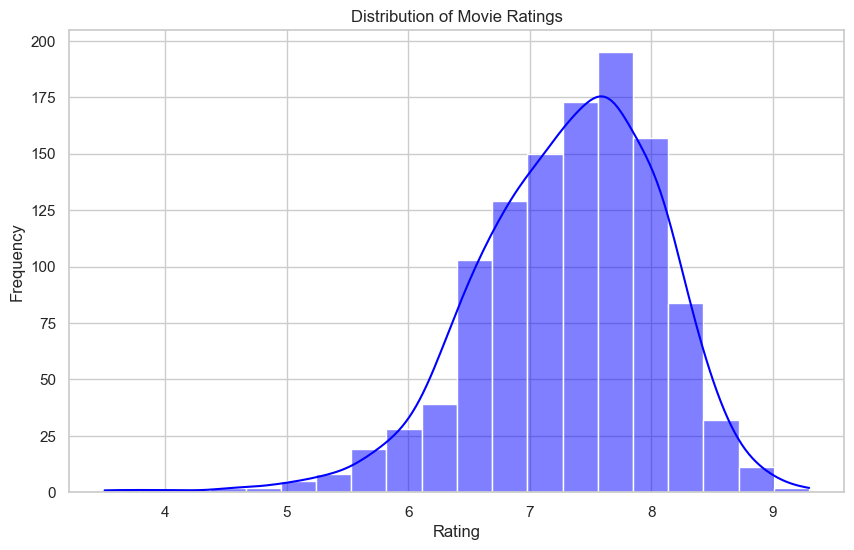

In [50]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set(style="whitegrid")

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

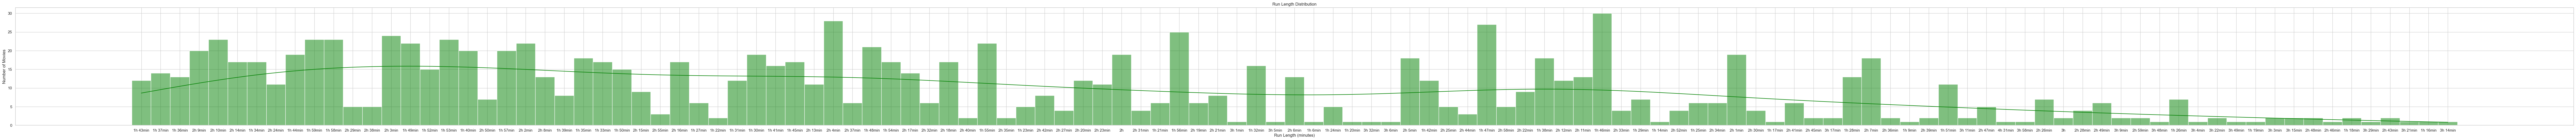

In [51]:
# Plot run length distribution
plt.figure(figsize=(130, 6))
sns.histplot(df['run_length'], bins=20, kde=True, color='green')
plt.title('Run Length Distribution')
plt.xlabel('Run Length (minutes)')
plt.ylabel('Number of Movies')
plt.show()

In [52]:
# Get top 10 movies by rating
top_movies = df.sort_values(by='rating', ascending=False).head(10)

# Display as a table
print("Top 10 Movies by Rating:")
print(top_movies[['name', 'year', 'rating', 'genres']])

Top 10 Movies by Rating:
                                               name  year  rating  \
1001                       The Shawshank Redemption  1994     9.3   
883                                   The Godfather  1972     9.2   
884                          The Godfather: Part II  1974     9.0   
847                                 The Dark Knight  2008     9.0   
961                                 The Mountain II  2016     8.9   
700                                Schindler's List  1993     8.9   
944   The Lord of the Rings: The Return of the King  2003     8.9   
643                                    Pulp Fiction  1994     8.9   
2                                      12 Angry Men  1957     8.9   
306                                    Forrest Gump  1994     8.8   

                           genres  
1001                      Drama;   
883                Crime; Drama;   
884                Crime; Drama;   
847        Action; Crime; Drama;   
961          Action; Drama; War;   

C:\Users\Nathan\AppData\Local\Temp\ipykernel_5680\3121242452.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num_genres', data=df, palette='magma')


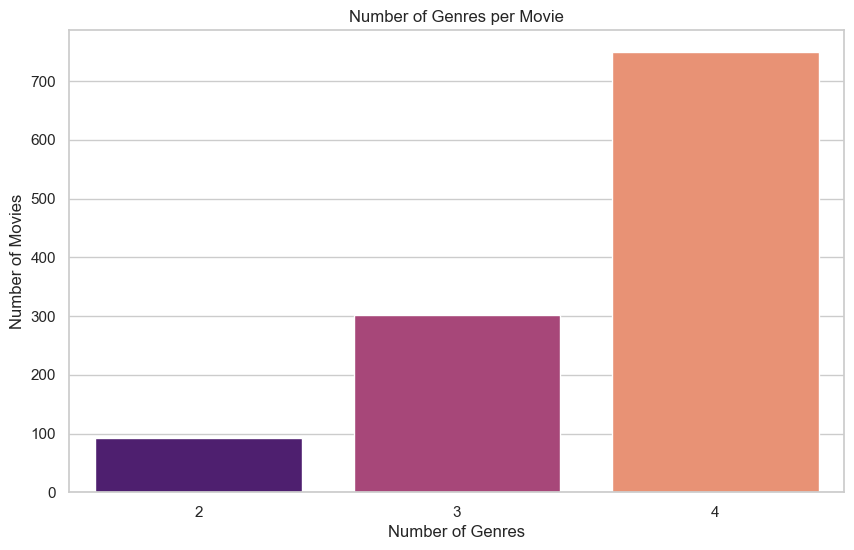

In [53]:
# Count the number of genres per movie
df['num_genres'] = df['genres'].str.split(';').apply(len)

# Plot distribution of genres per movie
plt.figure(figsize=(10, 6))
sns.countplot(x='num_genres', data=df, palette='magma')
plt.title('Number of Genres per Movie')
plt.xlabel('Number of Genres')
plt.ylabel('Number of Movies')
plt.show()